<a href="https://colab.research.google.com/github/rsautter/GPA_Tutorial/blob/main/GPA_HandsOn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !pip install --force-reinstall git+https://github.com/rsautter/GPA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/GPA to /tmp/pip-req-build-l0tanduv
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/GPA /tmp/pip-req-build-l0tanduv
  Resolved https://github.com/rsautter/GPA to commit 372119c81a78a97c2727d3d0ae4b36f8edb4d23e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GPA: filename=GPA-3.4-cp310-cp310-linux_x86_64.whl size=2268112 sha256=564f538dc87d06f60eae9c3970fcc52b571f985a35234b1d72204d7fd6e9f33e
  Stored in directory: /tmp/pip-ephem-wheel-cache-w2qkd7ko/wheels/8b/55/b6/4d841dd9660865970155bd3c405b33625122913220d28e682e
Successfully built GPA
  Attempting uninstall: GPA
    Found existing installation: GPA 3.4
    Uninstalling GPA-3.4:
      Successfully uninstalled GPA-3.4


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from GPA import GPA 

# Gradient Pattern Analysis (GPA)


In the code below, a GPA object is being created. The constructor method of the GPA class takes the tolerance parameter as input, which in this example is set to 3%.

In [3]:
ga = GPA(0.03)

# 1. Fundamental Matrices

Fundamental matrices are the simplest case study, which are defined by 3x3 elements.  

In [29]:
laminar = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

In [ ]:
symmetrical1 = np.array([
    [1,2,1],
    [2,5,2],
    [1,2,1]
])

In [12]:
symmetrical2 = np.array([
    [5,1,5],
    [1,0,1],
    [5,1,5]
])

In [26]:
quasiSymmetrical = np.array([
    [1,2,1.03],
    [2.01,5,2],
    [1,2.07,0.98]
])

In [33]:
shuffled = laminar.copy().ravel()
np.random.shuffle(shuffled)
shuffled = shuffled.reshape(3,3)
shuffled

array([[1, 7, 4],
       [6, 2, 5],
       [3, 8, 9]])

The evaluation method GPA requires an Numpy vector of the type **float** as input. In the following code, we are converting the type of vector from **int** to **float**.

In [34]:
laminar = laminar.astype(float)
symmetrical1 = symmetrical1.astype(float)
symmetrical2 = symmetrical2.astype(float) 
quasiSymmetrical = quasiSymmetrical.astype(float)
shuffled = shuffled.astype(float)

The method **\_\_cal\_\_()** in Python is a special case, 

In [8]:
ga(laminar, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.19526214587563495,
 'G1C': 0.7777777777777778,
 'G2': 0.4999999999999999,
 'G3': 0.7587841046115789,
 'G4': (1.879772282303151+1.6894873043266947j)}

In [11]:
ga(symmetrical1, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.0, 'G1C': 0.0, 'G2': 0.0, 'G3': 0.0, 'G4': 0j}

In [16]:
ga(symmetrical2, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.0, 'G1C': 0.0, 'G2': 0.0, 'G3': 0.0, 'G4': 0j}

In [27]:
ga(quasiSymmetrical, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.2044965459699355,
 'G1C': 0.25,
 'G2': 0.4977858457773628,
 'G3': 0.25006112592517393,
 'G4': (1.090979818834745-0.04346464096261893j)}

In [35]:
ga(shuffled, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.3593262394264283,
 'G1C': 1.2222222222222223,
 'G2': 0.7959792163108705,
 'G3': 0.7744594584132449,
 'G4': (1.2240803352519527+0.9633961595810752j)}

# 2. SLOAN + Galaxy Zoo 1 

## 2.1 Pre-processing

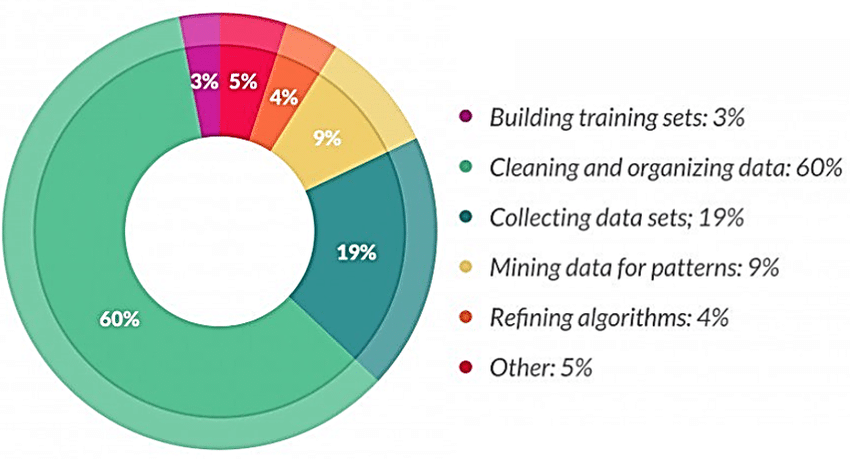

Source: [Sarih, et al.(2019)](https://www.researchgate.net/publication/335577003_Data_preparation_and_preprocessing_for_broadcast_systems_monitoring_in_PHM_framework)

# 3. Extragalactic Radio Sources

